In [4]:
import sys
import pandas as pd
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))

sys.path.append(project_root)
data_dir = os.path.join(project_root, 'data')

data_file_path = os.path.join(data_dir, 'RADCURE_processed_clinical.csv')
df = pd.read_csv(data_file_path, index_col=0)

df.drop(columns=["Study ID", "survival_time"], inplace=True)

In [ ]:
from jarvais.analyzer import Analyzer
from rich import print

analyzer = Analyzer(
    data=df, 
    output_dir='./outputs/analyzer',
    categorical_columns= [
      "Sex",
      "T Stage",
      "N Stage",
      "Stage",
      "Smoking Status",
      "Disease Site",
      "death",
      "HPV Combined",
      "Chemotherapy"
    ],
    continuous_columns = [
      "age at dx",
      "Dose"
    ],
    target_variable='death', 
    task='classification'
)
analyzer.encoding_module.enabled = False # AutoGluon will handle encoding

print(analyzer)

analyzer.run()

14:45:47 [warning  ] Date columns not specified. Inferring from remaining columns. [jarvais] call=analyzer.__init__:76


Analyzer(
    AnalyzerSettings(
        output_dir=PosixPath('outputs/analyzer'),
        categorical_columns=[
            'Sex',
            'T Stage',
            'N Stage',
            'Stage',
            'Smoking Status',
            'Disease Site',
            'death',
            'HPV Combined',
            'Chemotherapy'
        ],
        continuous_columns=['age at dx', 'Dose'],
        date_columns=[],
        task='classification',
        target_variable='death',
        generate_report=True,
        settings_path=None,
        settings_schema_path=None,
        missingness=MissingnessModule(
            categorical_strategy={
                'Sex': 'unknown',
                'T Stage': 'unknown',
                'N Stage': 'unknown',
                'Stage': 'unknown',
                'Smoking Status': 'unknown',
                'Disease Site': 'unknown',
                'death': 'unknown',
                'HPV Combined': 'unknown',
                'Chemotherapy': 'unknown'
            },
            continuous_strategy={'age at dx': 'median', 'Dose': 'median'},
            enabled=True
        ),
        outlier=OutlierModule(
            categorical_strategy={
                'Sex': 'frequency',
                'T Stage': 'frequency',
                'N Stage': 'frequency',
                'Stage': 'frequency',
                'Smoking Status': 'frequency',
                'Disease Site': 'frequency',
                'death': 'frequency',
                'HPV Combined': 'frequency',
                'Chemotherapy': 'frequency'
            },
            continuous_strategy={'age at dx': 'none', 'Dose': 'none'},
            threshold=0.01,
            enabled=True
        ),
        encoding=OneHotEncodingModule(
            columns=[
                'Sex',
                'T Stage',
                'N Stage',
                'Stage',
                'Smoking Status',
                'Disease Site',
                'HPV Combined',
                'Chemotherapy'
            ],
            target_variable='death',
            prefix_sep='|',
            enabled=False
        ),
        visualization=VisualizationModule(
            plots=['corr', 'pairplot', 'umap', 'frequency_table', 'multiplot'],
            enabled=True
        )
    )
)

         [info     ] Performing missingness analysis... [jarvais] call=missingness.__call__:43
         [info     ] Performing outlier analysis... [jarvais] call=outlier.__call__:53
         [info     ] Plotting Correlation Matrix... [jarvais] call=visualization.__call__:115


+-----------------------+-------------------+-----------+-------------+
|                       |                   | Missing   | Overall     |
+=======================+===================+===========+=============+
| n                     |                   |           | 3346        |
+-----------------------+-------------------+-----------+-------------+
| age at dx, mean (SD)  |                   | 0         | 62.3 (11.6) |
+-----------------------+-------------------+-----------+-------------+
| Dose, mean (SD)       |                   | 0         | 66.7 (5.8)  |
+-----------------------+-------------------+-----------+-------------+
| Sex, n (%)            | Female            |           | 686 (20.5)  |
+-----------------------+-------------------+-----------+-------------+
|                       | Male              |           | 2660 (79.5) |
+-----------------------+-------------------+-----------+-------------+
| T Stage, n (%)        | None              |           | 12 (0.

         [info     ] Plotting Pairplot...           [jarvais] call=visualization.__call__:118
14:45:48 [info     ] Plotting UMAP...               [jarvais] call=visualization.__call__:124
14:45:54 [info     ] Plotting Frequency Table...    [jarvais] call=visualization.__call__:121
14:46:03 [info     ] Plotting Multiplot...          [jarvais] call=visualization.__call__:136
14:46:06 [warning  ] One-hot encoding is disabled.  [jarvais] call=encoding.__call__:40
Font MPDFAA+Inter28ptBold is missing the following glyphs: '
' (\n)


In [6]:
from jarvais.trainer import TrainerSupervised

df = pd.read_csv('./outputs/analyzer/updated_data.csv')

trainer = TrainerSupervised(task='binary', output_dir='./outputs/trainer')
trainer.run(df, 'death')

Training fold 1/5...
Fold 1 score: 0.8136486155354079
Training fold 2/5...
Fold 2 score: 0.7975441509916009
Training fold 3/5...
Fold 3 score: 0.7589550761923609
Training fold 4/5...
Fold 4 score: 0.7952386488192115
Training fold 5/5...
Fold 5 score: 0.7860460795243404

Model Leaderboard (Displays values in "mean [min, max]" format across training folds)
------------------------------------------------------------------------------------
+-----------------------+--------------------------+--------------------------+--------------------------+
| model                 | score_test               | score_val                | score_train              |
+=======================+==========================+==========================+==========================+
| WeightedEnsemble_L2   | AUROC 0.76 [0.75, 0.76]  | AUROC 0.79 [0.76, 0.81]  | AUROC 0.85 [0.81, 0.91]  |
|                       | F1: 0.49 [0.46, 0.51]    | F1: 0.52 [0.47, 0.6]     | F1: 0.6 [0.52, 0.7]      |
|                      

⚠️  **Possible Bias Detected in N Stage** ⚠️

=== Subgroup Analysis for 'N Stage' Using OLS Regression ===

Model Statistics:
    R-squared:                  0.025
    F-statistic:                2.461
    F-statistic p-value:        0.0169
    AIC:                        1126.48
    Log-Likelihood:             -555.24
Model Coefficients:
    +---------------+---------------+------------------+
    | Feature       |   Coefficient |   Standard Error |
    +===============+===============+==================+
    | const         |         0.438 |            0.029 |
    +---------------+---------------+------------------+
    | N Stage_N0    |         0.127 |            0.043 |
    +---------------+---------------+------------------+
    | N Stage_N1    |         0.131 |            0.067 |
    +---------------+---------------+------------------+
    | N Stage_N2    |        -0.187 |            0.086 |
    +---------------+---------------+------------------+
    | N Stage_N2a   |        -0.

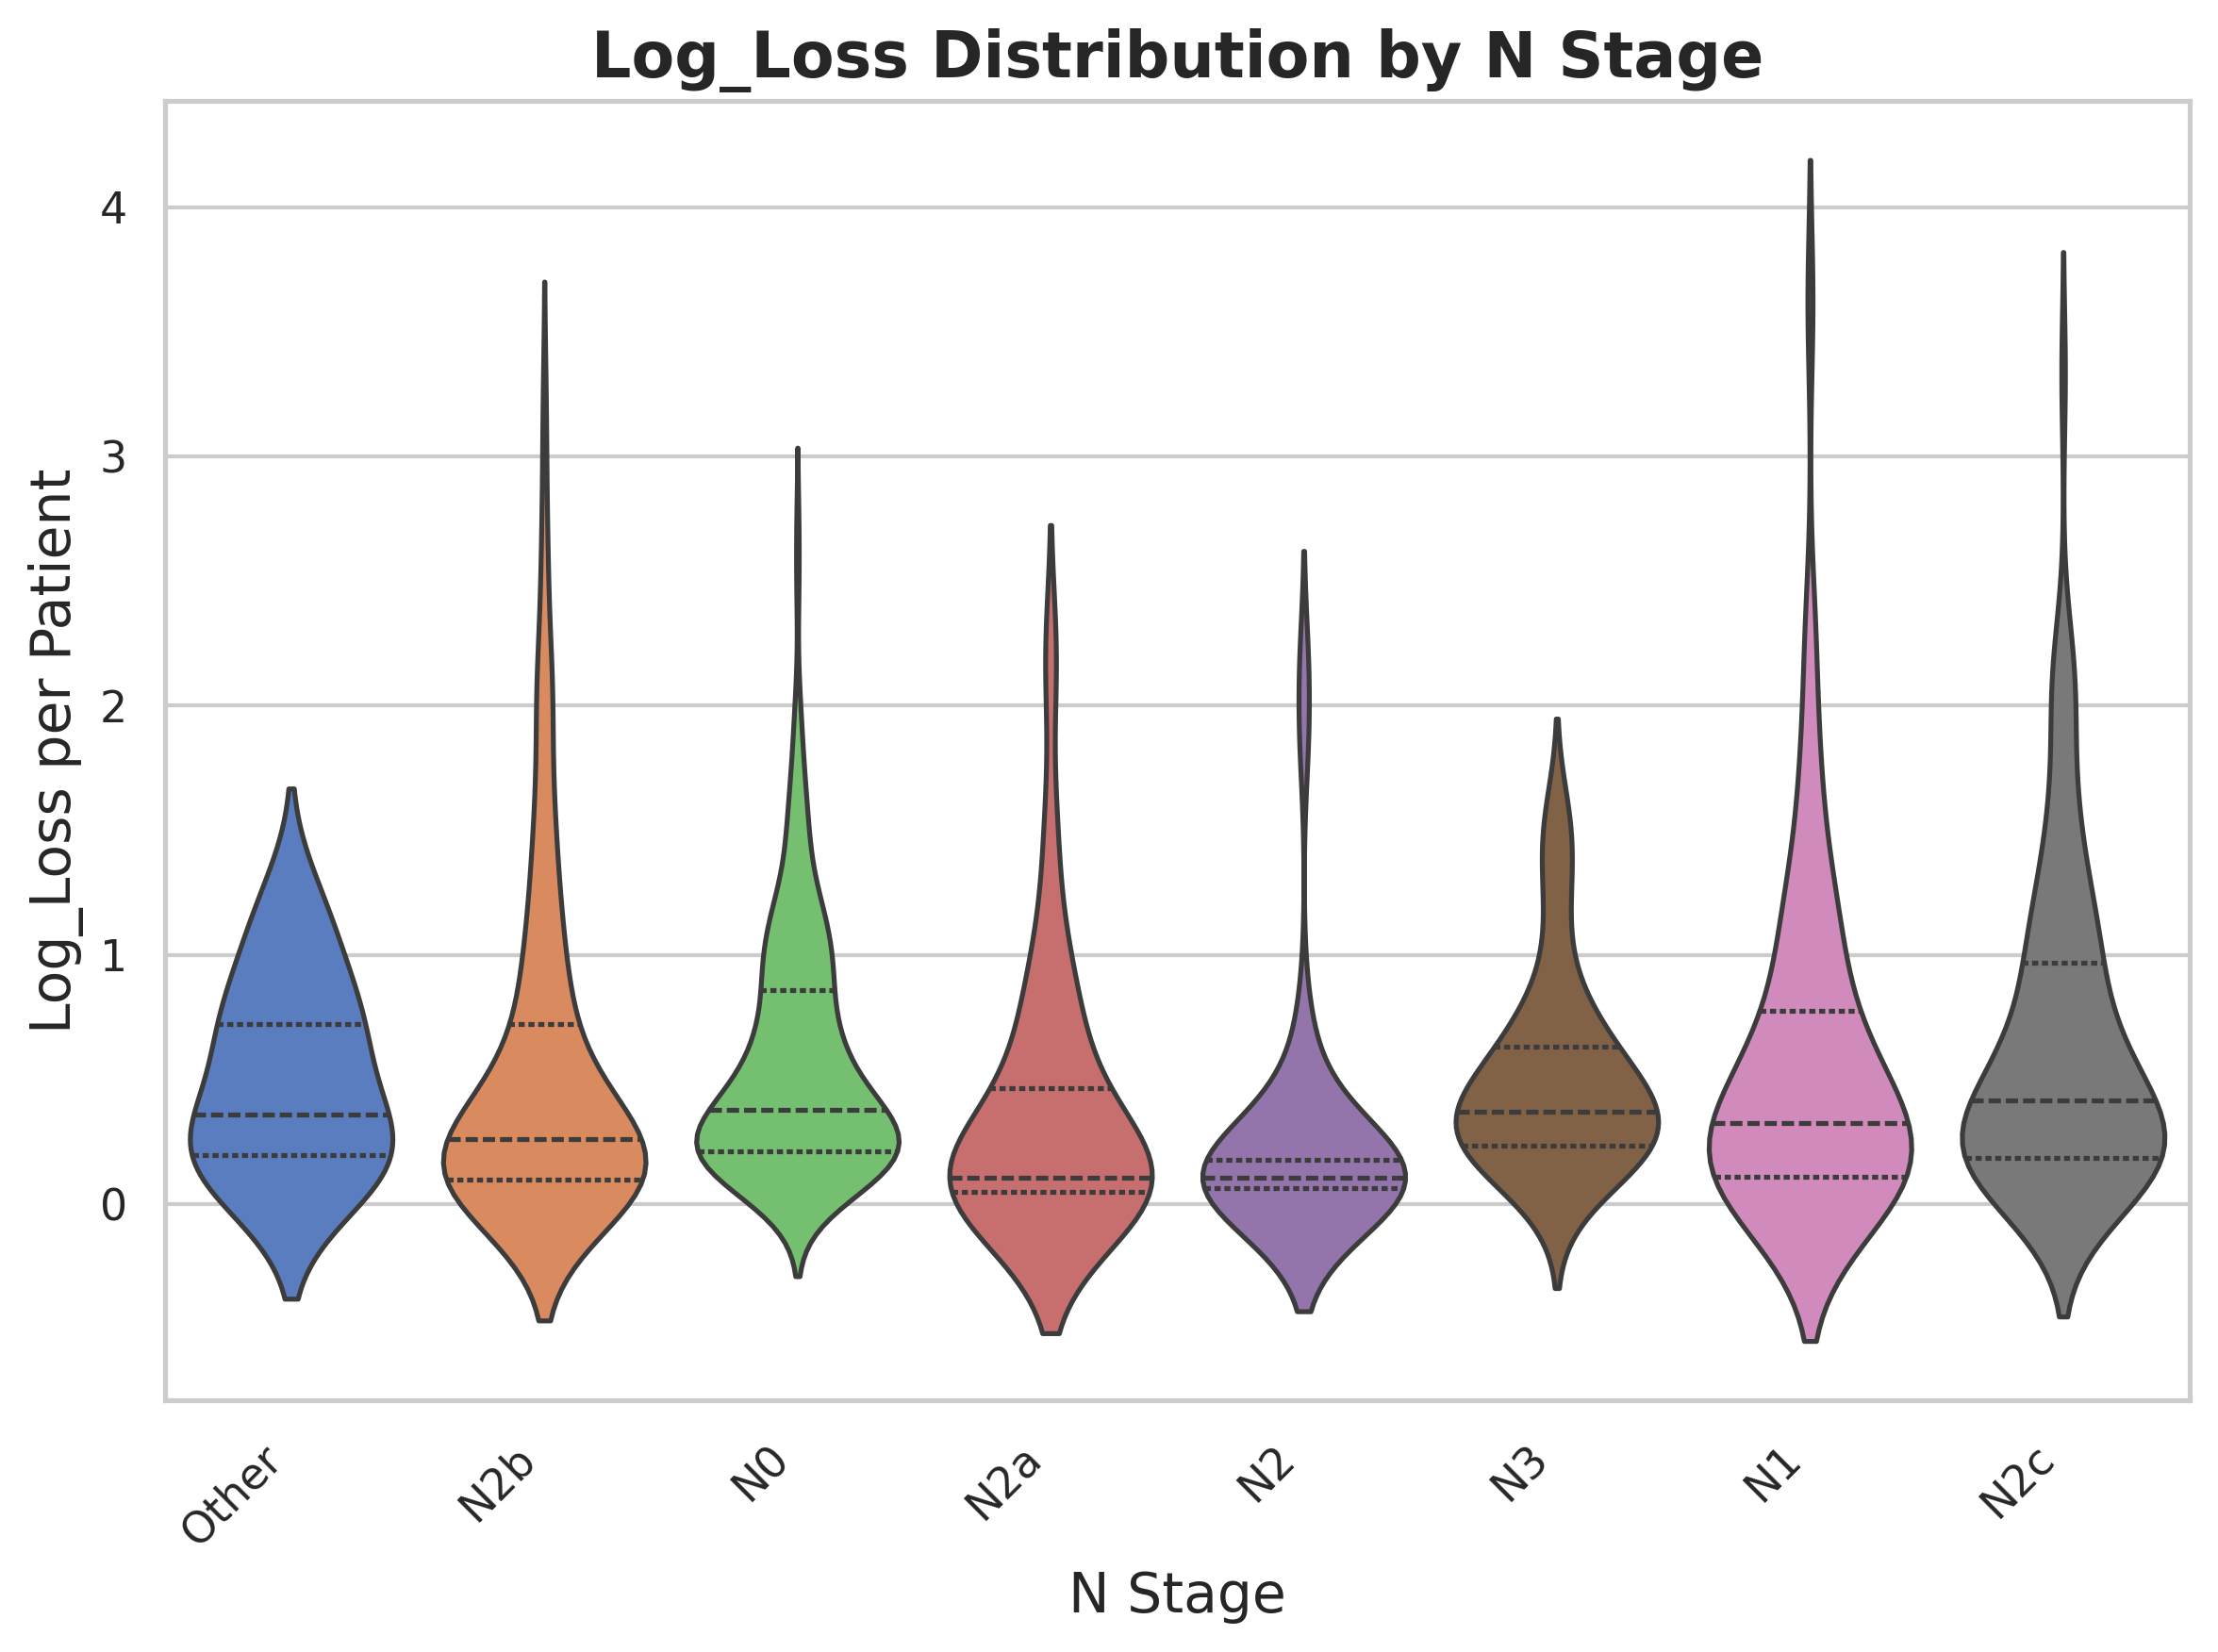


=== Subgroup Analysis for 'N Stage' using FairLearn ===

    +------------------------------+---------------------+---------------------+----------------------+----------------------+
    |                              | N0                  | N1                  | N2                   | N2a                  |
    +==============================+=====================+=====================+======================+======================+
    | mean_prediction              | 0.18326693227091634 | 0.23880597014925373 | 0.08108108108108109  | 0.07142857142857142  |
    +------------------------------+---------------------+---------------------+----------------------+----------------------+
    | false_positive_rate          | 0.13142857142857142 | 0.11363636363636363 | 0.030303030303030304 | 0.045454545454545456 |
    +------------------------------+---------------------+---------------------+----------------------+----------------------+
    | Relative mean_prediction     | 1.000 ✅         

100%|██████████| 100/100 [04:05<00:00,  2.46s/it]


In [7]:
from jarvais.explainer import Explainer

sensitive_features = {k: trainer.X_test[k] for k in ['N Stage', 'Disease Site', 'Sex']}

exp = Explainer.from_trainer(trainer, sensitive_features=sensitive_features)
exp.run()